In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import matplotlib as mpl

# Clusters

(0, 512)

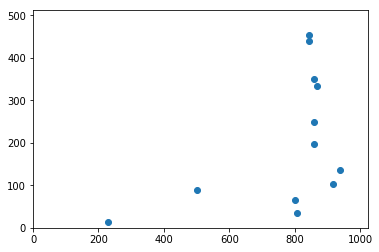

In [65]:
def makeCluster(wx, wy, npix, nclusters = 1):
    cluster=[]
    for nc in range(nclusters):
        x = np.random.normal(0, wx, npix*5)
        y = np.random.normal(0, wy, npix*5)
        cx = np.random.randint(int(wx*3), 1024-(wx*3))
        cy = np.random.randint(int(wy*3),  512-(wy*3))
        angle = np.random.uniform(0, np.pi, npix*5)
        x = x*np.cos(angle)+y*np.sin(angle)+cx
        y = y*np.cos(angle)-x*np.sin(angle)+cy
        x = x.astype(int)
        y = y.astype(int)
        
        k = 0
        for i in range(len(x)):
            if (x[i],y[i]) not in cluster and k<npix:
                k+=1
                cluster.append((x[i],y[i]))
            
    return np.array(cluster)
        
    
    
cluster= makeCluster(10,1, 10, 5)
plt.scatter(cluster[:,0], cluster[:,1])#, range=[[0,1024], [0,512]], bins=[1024,512], norm=mpl.colors.LogNorm(), cmap=mpl.cm.gray)
plt.xlim(0,1024)
plt.ylim(0,512)


# DBscan

In [4]:
i = 0
total_clusters = 0
total_noise_points = 0
while True:
    file_name="file{0:0d}.npy".format(i)
    my_file = Path(file_name)
    if my_file.is_file():
        i += 1
        packet = np.load(file_name, allow_pickle=True)
        for k in range(len(packet)):
            X=packet[k]
            db = DBSCAN(eps=1, min_samples=2).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            nc = 0
            #initialize an empty list to accomodate the sample coordinates whitin the cluster
            clusters = [[] for _ in range(n_clusters_)]
            #total_clusters += n_clusters_
            #total_noise_points += n_noise_
            for j in range(len(db.labels_)):
                if db.labels_[j] == -1:	#noise sample has label -1
                    nc = nc + 1	#noise counter
                else: 
                    index = db.labels_[j]
                    #print(db.components_[j-nc])
                    clusters[index].append(np.array(db.components_[j - nc])) #subtract noise counter to the index
    else:
        print ("No more packets")
        break
        

No more packets
